In [1]:
import requests
payload={
'encodeURIComponent':'1',
'step':'1',
'firstin':'1',
'TYPEK':'sii',
'code':'',
'year':'104',
'season':'03'    
    
}
res = requests.post('http://mops.twse.com.tw/mops/web/ajax_t163sb19', data=payload)
res.encoding = 'utf-8'
#print res.text

In [2]:
from bs4 import BeautifulSoup as bsqoo
soup = bs(res.text, 'html.parser')

In [3]:
import pandas as pd
dfs = pd.read_html(soup.prettify('utf-8'), encoding='utf-8', header=0)

In [4]:
dfs[2]['營業收入'.decode('utf-8')]

0       2278102
1     145699706
2     232854191
3     250678904
4       1467439
5           NaN
6       8477479
7           NaN
8      16334937
9       2274857
10     15751120
11      9766655
12      2071424
13     10310043
14          NaN
15      3354193
16      3722115
17       810474
18     39546827
19       971007
20      8941610
21     13086181
22      3651709
23     13191550
24     33466894
25     21480374
26          NaN
27          NaN
Name: 營業收入, dtype: float64

In [5]:
#dir(dfs[0]['公司代號'.decode('utf-8')].str)

In [6]:
#dfs[0]['公司代號'.decode('utf-8')].str.match('^[0-9]+')

In [7]:
import re
email = 'apple@gmail.com'
str1 = 'a'
m = re.search('a', str1)
print m

m = re.search('b', str1)
print m

m = re.search('[abcdefghijklmnopqrstuvwxyz]', str1)
print m

m = re.search('[a-z]', str1)
print m

None


In [8]:
num = '3'

m = re.search('3', num)
print m

m = re.search('[0123456789]', num)
print m

m = re.search('[0-9]', num)
print m

m = re.search('\d', num)
print m

In [9]:
str2 = 'A'
m = re.search('[0-9a-z]', str2)
print m

m = re.search('[0-9a-zA-Z]', str2)
print m

m = re.search('\w', str2)
print m


None


In [10]:
str3 = '!'
m = re.search('.', str2)
print m

In [11]:
phone = '0912345678'
m = re.search('\d{10}', phone)
print m

phone2 = '021234554344234i2423'
m = re.search('\d{10,}', phone2)
print m

phone3 = ''
m = re.search('\d{0,}', phone3)
print m

phone3 = ''
m = re.search('\d*', phone3) # {0,}
print m


phone4 = '2'
m = re.search('\d{1,}', phone4)
print m

phone4 = '2'
m = re.search('\d+', phone3) # {1,}
print m

None


In [12]:
phones = ['0912345678', '0912-345678', '0912-345-678', '0912345678912345']
print [re.search('\d{10}', phone) for phone in phones]
print [re.search('\d{4}-{0,1}\d{3}-?\d{3}', phone) for phone in phones] #{0,1} => ?
print [re.search('^\d{4}-?\d{3}-?\d{3}$', phone) for phone in phones]

[<_sre.SRE_Match object at 0x000000000CA3E308>, None, None, <_sre.SRE_Match object at 0x000000000CA3E1D0>]
[<_sre.SRE_Match object at 0x000000000CA3E308>, <_sre.SRE_Match object at 0x000000000CA3E1D0>, <_sre.SRE_Match object at 0x000000000CA3E2A0>, <_sre.SRE_Match object at 0x000000000CA3E168>]
[<_sre.SRE_Match object at 0x000000000CA3E308>, <_sre.SRE_Match object at 0x000000000CA3E1D0>, <_sre.SRE_Match object at 0x000000000CA3E2A0>, None]


In [13]:
emails = ['a@gmail.com', '0912@vcool.com', '1-1*@1', 'a@qoo.com.tw', 'thisisatest']
print [re.search('^[a-z]\w*@\w+\..+', email) for email in emails]

[<_sre.SRE_Match object at 0x000000000CA3E238>, None, None, <_sre.SRE_Match object at 0x000000000CA3E2A0>, None]


In [14]:
df = dfs[0]
df[df['公司代號'.decode('utf-8')].str.match('^[0-9]+')]

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
0,1104,環球水泥股份有限公司,水泥工業,1.46,新台幣 10.0000元,3770779,96507,886531,909732
1,1102,亞洲水泥股份有限公司,水泥工業,1.41,新台幣 10.0000元,49113910,2854548,2234539,4406554
2,1101,台灣水泥股份有限公司,水泥工業,1.08,新台幣 10.0000元,69118302,6607616,-723929,4691790
3,1108,幸福水泥股份有限公司,水泥工業,1.01,新台幣 10.0000元,3765704,559253,-17865,399494
5,1110,東南水泥股份有限公司,水泥工業,0.21,新台幣 10.0000元,1371851,69135,53277,122288
7,1109,信大水泥股份有限公司,水泥工業,-0.09,新台幣 10.0000元,3204963,-6131,-48231,-101495
8,1103,嘉新水泥股份有限公司,水泥工業,-0.62,新台幣 10.0000元,1957612,-400817,31022,-384582


In [15]:
dfall = []
for df in dfs:
    dfall.append(df[df['公司代號'.decode('utf-8')].str.match('^\d+')])

In [16]:
stockdf = pd.concat(dfall, ignore_index=True)

In [17]:
print type('公司代號'.decode('utf-8'))

<type 'unicode'>


In [18]:
stockdf[stockdf['公司代號'.decode('utf-8')] == '2330']

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
475,2330,台灣積體電路製造股份有限公司,半導體業,9.01,新台幣 10.0000元,639978805,2.42084e+08,2.77012e+07,233714112


In [19]:
stockdf[stockdf['基本每股盈餘(元)'.decode('utf-8')] >=  10]

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
52,1476,儒鴻企業股份有限公司,紡織纖維,11.41,新台幣 10.0000元,18275760,3425355,263346,2977439
98,2231,為升電裝工業股份有限公司,電機機械,11.64,新台幣 10.0000元,2082184,921532,59504,845766
99,1558,伸興工業股份有限公司,電機機械,11.26,新台幣 10.0000元,4617882,744491,164209,688361
218,2207,和泰汽車股份有限公司,汽車工業,14.09,新台幣 10.0000元,119012461,7.39849e+06,2.99448e+06,8522347
219,2227,裕隆日產汽車股份有限公司,汽車工業,10.89,新台幣 10.0000元,26593629,978662,2.93615e+06,3266264
409,1704,李長榮化學工業股份有限公司,化學工業,10.15,新台幣 10.0000元,26651101,1465767,7262830,8453891
437,6452,康友製藥控股有限公司,生技醫療業,11.15,新台幣 10.0000元,3182078,862112,56297,686792
473,2454,聯發科技股份有限公司,半導體業,13.77,新台幣 10.0000元,151542321,2.21601e+07,2.46339e+06,21588172
474,6415,矽力杰股份有限公司,半導體業,10.35,新台幣 10.0000元,3346651,732556,75085,793201
545,2357,華碩電腦股份有限公司,電腦及週邊設備業,16.90,新台幣 10.0000元,339612346,1.51762e+07,1.17296e+06,12624685


In [20]:
stockdf['營業收入'.decode('utf-8')].max()

3052432520.0

In [21]:
#stockdf['營業收入'.decode('utf-8')] == stockdf['營業收入'.decode('utf-8')].max()
stockdf[stockdf['營業收入'.decode('utf-8')] == stockdf['營業收入'.decode('utf-8')].max()]

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
846,2317,鴻海精密工業股份有限公司,其他電子業,6.03,新台幣 10.0000元,3052432520,1.09879e+08,1.87399e+07,96511302


In [22]:
stockdf.sort_values(by= '營業收入'.decode('utf-8'), ascending=False).head()

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
846,2317,鴻海精密工業股份有限公司,其他電子業,6.03,新台幣 10.0000元,3052432520,1.09879e+08,1.87399e+07,96511302
549,4938,和碩聯合科技股份有限公司,電腦及週邊設備業,6.60,新台幣 10.0000元,801729003,2.64475e+07,794213,20459776
555,2382,廣達電腦股份有限公司,電腦及週邊設備業,3.34,新台幣 10.0000元,732099688,1.27085e+07,3.84250e+06,12753862
475,2330,台灣積體電路製造股份有限公司,半導體業,9.01,新台幣 10.0000元,639978805,2.42084e+08,2.77012e+07,233714112
573,2324,仁寶電腦工業股份有限公司,電腦及週邊設備業,1.48,新台幣 10.0000元,613007343,8.22817e+06,502059,6594618


In [23]:
df1 = stockdf.groupby(['產業別'.decode('utf-8')], sort=False)['營業收入'.decode('utf-8')].sum()

In [24]:
df1

產業別
水泥工業         132303121
食品工業         505091370
塑膠工業         840187791
紡織纖維         379681168
電機機械         308412261
電器電纜         202547629
玻璃陶瓷          42783872
造紙工業         120633641
鋼鐵工業         504617008
橡膠工業         177602475
汽車工業         304923813
建材營造         213615275
航運業          549371461
觀光事業          62091361
金融保險業       1645742610
貿易百貨         426482210
其他           649938457
化學工業         224345958
生技醫療業         66545122
油電燃氣業        515749199
半導體業        1676527822
電腦及週邊設備業    4126129991
光電業         1194369220
通信網路業        713877274
電子零組件業       957895898
電子通路業       1003505805
資訊服務業         35675754
其他電子業       3344724542
Name: 營業收入, dtype: float64

In [25]:
df2 = stockdf.groupby(['產業別'.decode('utf-8')], sort=False)['營業收入'.decode('utf-8')].max()

In [26]:
df2

產業別
水泥工業          69118302
食品工業         320635395
塑膠工業         250678904
紡織纖維         160880353
電機機械          71697873
電器電纜         111900156
玻璃陶瓷          30332940
造紙工業          47165849
鋼鐵工業         222060055
橡膠工業          89243212
汽車工業         119012461
建材營造          21313146
航運業          109874296
觀光事業          16295035
金融保險業        348579020
貿易百貨         153065676
其他           198449597
化學工業          30423078
生技醫療業         11138402
油電燃氣業        479217566
半導體業         639978805
電腦及週邊設備業     801729003
光電業          282669377
通信網路業        169571048
電子零組件業       147843416
電子通路業        372935787
資訊服務業         11566283
其他電子業       3052432520
Name: 營業收入, dtype: float64

In [27]:
idx = stockdf.groupby(['產業別'.decode('utf-8')])['營業收入'.decode('utf-8')].transform(max) == stockdf['營業收入'.decode('utf-8')]
stockdf[idx].head()

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
2,1101,台灣水泥股份有限公司,水泥工業,1.08,新台幣 10.0000元,69118302,6.60762e+06,-723929,4691790
11,1216,統一企業股份有限公司,食品工業,2.21,新台幣 10.0000元,320635395,1.86818e+07,5.63372e+06,19357662
32,1326,台灣化學纖維股份有限公司,塑膠工業,3.68,新台幣 10.0000元,250678904,1.49122e+07,1.31223e+07,24503738
57,1402,遠東新世紀股份有限公司,紡織纖維,1.42,新台幣 10.0000元,160880353,12170874,4410489,12571397
145,2371,大同股份有限公司,電機機械,-0.91,新台幣 10.0000元,71697873,-7.32828e+06,287023,-7715882


In [28]:
#stockdf.groupby(['產業別'.decode('utf-8')])['營業收入'.decode('utf-8')]

In [29]:
df1

產業別
水泥工業         132303121
食品工業         505091370
塑膠工業         840187791
紡織纖維         379681168
電機機械         308412261
電器電纜         202547629
玻璃陶瓷          42783872
造紙工業         120633641
鋼鐵工業         504617008
橡膠工業         177602475
汽車工業         304923813
建材營造         213615275
航運業          549371461
觀光事業          62091361
金融保險業       1645742610
貿易百貨         426482210
其他           649938457
化學工業         224345958
生技醫療業         66545122
油電燃氣業        515749199
半導體業        1676527822
電腦及週邊設備業    4126129991
光電業         1194369220
通信網路業        713877274
電子零組件業       957895898
電子通路業       1003505805
資訊服務業         35675754
其他電子業       3344724542
Name: 營業收入, dtype: float64

In [45]:
%pylab inline
from pylab import mpl
#print dir(mpl)
mpl.rcParams['font.sans-serif'] = 'Microsoft YaHei'

Populating the interactive namespace from numpy and matplotlib


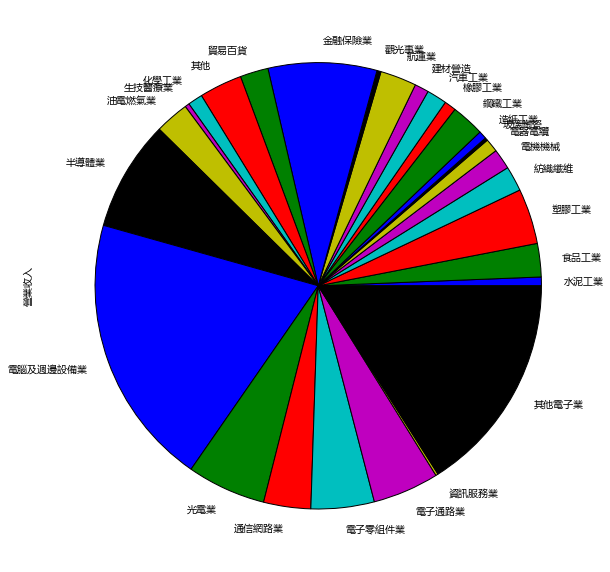

In [46]:
df1.plot.pie(figsize=(10, 10))

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

payload={
    'encodeURIComponent':'1',
    'step':'1',
    'firstin':'1',
    'TYPEK':'sii',
    'code':'',
    'year':'104',
    'season':'03'    
}

def getEPS(year, season):
    dfall = []
    payload['year'] = year
    payload['season'] = season
    res = requests.post('http://mops.twse.com.tw/mops/web/ajax_t163sb19', data=payload)
    res.encoding = 'utf-8'
    soup = bs(res.text, 'html.parser')
    dfs = pd.read_html(soup.prettify('utf-8'), encoding='utf-8', header=0)
    for df in dfs:
        stockdf = df[df['公司代號'.decode('utf-8')].str.match('^\d+')]
        stockdf['Year'] = year
        stockdf['Season'] = season
        dfall.append(stockdf)
    return dfall

In [2]:
dfs10403 = getEPS('104', '03')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [156]:
dfs10403[0].head(3)

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利,Year,Season
0,1104,環球水泥股份有限公司,水泥工業,1.46,新台幣 10.0000元,3770779,96507,886531,909732,104,03
1,1102,亞洲水泥股份有限公司,水泥工業,1.41,新台幣 10.0000元,49113910,2854548,2234539,4406554,104,03
2,1101,台灣水泥股份有限公司,水泥工業,1.08,新台幣 10.0000元,69118302,6607616,-723929,4691790,104,03


In [157]:
a = [1,2,3]
b = [2,3,4]
a.extend(b)
print a

[1, 2, 3, 2, 3, 4]


In [158]:
dfsall= []
seasons = ['01', '02', '03', '04']
for year in range(102, 105):
    for season in seasons:
        print year, season
        dfs = getEPS(str(year), season)
        dfsall.extend(dfs)


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


102 01
102 02
102 03
102 04
103 01
103 02
103 03
103 04
104 01
104 02
104 03
104 04


In [159]:
len(dfsall)

343

In [160]:
stockdf = pd.concat(dfsall, ignore_index=True)

In [161]:
stockdf.head()

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利,Year,Season
0,1102,亞洲水泥股份有限公司,水泥工業,0.40,新台幣 10.0000元,13931550,339801,1.25004e+06,1371559,102,01
1,1101,台灣水泥股份有限公司,水泥工業,0.38,新台幣 10.0000元,24114047,2.02673e+06,314060,1999624,102,01
2,1104,環球水泥股份有限公司,水泥工業,0.30,新台幣 10.0000元,1248072,30247,156012,183441,102,01
3,1108,幸福水泥股份有限公司,水泥工業,0.17,新台幣 10.0000元,1203671,98223,-13612,63869,102,01
4,1103,嘉新水泥股份有限公司,水泥工業,0.13,新台幣 10.0000元,741189,-149811,183613,59637,102,01


In [162]:
len(stockdf)


9947

In [71]:
stockdf[stockdf['公司代號'.decode('utf-8')] == '2330'].head()

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利,Year,Season
449,2330,台灣積體電路製造股份有限公司,半導體業,1.53,新台幣 10.0000元,132754996,4.4428e+07,1.31990e+06,39535543,102,01
1285,2330,台灣積體電路製造股份有限公司,半導體業,3.52,新台幣 10.0000元,288641316,1.02057e+08,3.7075e+06,91297046,102,02
2132,2330,台灣積體電路製造股份有限公司,半導體業,5.53,新台幣 10.0000元,451218350,1.61675e+08,3.43933e+06,143231798,102,03
2992,2330,台灣積體電路製造股份有限公司,半導體業,7.26,新台幣 10.0000元,597024197,2.09429e+08,6.05776e+06,188018937,102,04
3848,2330,台灣積體電路製造股份有限公司,半導體業,1.85,新台幣 10.0000元,148215172,5.25224e+07,779482,47845778,103,01


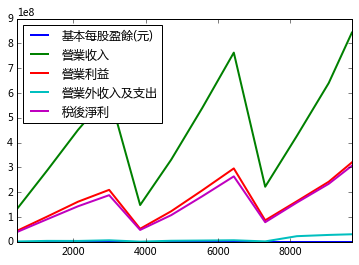

In [86]:
df2330 = stockdf[stockdf['公司代號'.decode('utf-8')] == '2330']
dir(df2330)
df2330.plot(kind='line', rot=0)


In [89]:
import requests
res = requests.get('http://www.twse.com.tw/ch/trading/fund/BFI82U/BFI82U.php?report1=day&input_date=105%2F03%2F28&mSubmit=%ACd%B8%DF&yr=2016&w_date=20160328&m_date=20160301')

#print res.text

In [91]:
import requests
payload ={
'report1':'day',
'input_date':'105/03/28',
'mSubmit':'%ACd%B8%DF'
}
res = requests.post('http://www.twse.com.tw/ch/trading/fund/BFI82U/BFI82U.php', data = payload)
res.encoding = 'big5'

In [93]:
import pandas as pd
soup = bs(res.text)
table = soup.select('.board_trad')[0]
df =pd.read_html(table.prettify('utf-8'), encoding = 'utf-8')

C:\Anaconda2\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [106]:
df2 = df[0]
df2.columns = df2.iloc[1]
df3 = df2.reindex(df2.index.drop([0,1]))

In [107]:
df3

1,單位名稱,買進金額,賣出金額,買賣差額
2,自營商(自行買賣),909335477,873085560,36249917
3,自營商(避險),3407347210,4263911288,-856564078
4,投信,1078000930,2051097147,-973096217
5,外資及陸資,14940261587,12073475531,2866786056
6,合計,20334945204,19261569526,1073375678


In [129]:
import requests
import pandas as pd

payload ={
'report1':'day',
'input_date':'105/03/28',
'mSubmit':'%ACd%B8%DF'
}

def getTrade(input_date):
    payload['input_date'] = input_date
    res = requests.post('http://www.twse.com.tw/ch/trading/fund/BFI82U/BFI82U.php', data = payload)
    res.encoding = 'big5'
    soup = bs(res.text)
    if len(soup.select('.board_trad'))>0:
        table = soup.select('.board_trad')[0]
        df =pd.read_html(table.prettify('utf-8'), encoding = 'utf-8')
        df2 = df[0]
        df2.columns = df2.iloc[1]
        df3 = df2.reindex(df2.index.drop([0,1]))
        df3['ymd'] = input_date
        return df3

In [130]:
from datetime import datetime, timedelta

dfsall = []

today = datetime.now().strftime('%Y/%m/%d')
for i in xrange(1,10):
    dt =  (datetime.now() - timedelta(days = i)).strftime('%Y/%m/%d')
    year, monthdate = dt.split('/', 1)[0], dt.split('/', 1)[1]
    year =  str(int(year) - 1911)
    ymd = year + '/' + monthdate
    df = getTrade(ymd)
    dfsall.append(df)

In [131]:
stockdf = pd.concat(dfsall)
stockdf

1,單位名稱,買進金額,賣出金額,買賣差額,ymd
2,自營商(自行買賣),909335477,873085560,36249917,105/03/28
3,自營商(避險),3407347210,4263911288,-856564078,105/03/28
4,投信,1078000930,2051097147,-973096217,105/03/28
5,外資及陸資,14940261587,12073475531,2866786056,105/03/28
6,合計,20334945204,19261569526,1073375678,105/03/28
2,自營商(自行買賣),728230590,914647455,-186416865,105/03/25
3,自營商(避險),3182970190,3321890579,-138920389,105/03/25
4,投信,912683040,1277344054,-364661014,105/03/25
5,外資及陸資,9834777046,13487480465,-3652703419,105/03/25
6,合計,14658660866,19001362553,-4342701687,105/03/25


In [120]:
a = '2016/03/28'
year, monthdate = a.split('/', 1)[0], a.split('/', 1)[1]
print year
year =  str(int(year) - 1911)
print year
print monthdate

2016
105
03/28


In [132]:
a = 5

if a > 3:
                               print "qoo"

qoo


In [133]:
a = 5

if a > 3:
 print "qoo"

qoo


In [134]:
import sqlite3 as lite
con = lite.connect('test.sqlite')
con.close()

In [137]:
import sqlite3 as lite 
import sys 
con = None 
dbname = 'test.sqlite'
try: 
    con = lite.connect(dbname) # connect to database 
    cur = con.cursor() # create cursor 
    cur.execute('SELECT SQLITE_VERSION()') # selece database version  
    data = cur.fetchone() # fetch one data at a time 
    print "SQLite version: %s" % data 
except lite.Error, e: 
    print "Error %s:" % e.args[0] 
    sys.exit(1) 
finally: 
    if con: 
        con.close()


SQLite version: 3.6.21


In [139]:
import sqlite3 as lite
con = lite.connect('test.sqlite')
print con
con.close()
cur = con.cursor()

ProgrammingError: Cannot operate on a closed database.

In [143]:
import sqlite3 as lite
con = lite.connect('test.sqlite')
with con:
    cur = con.cursor()
con.close()
cur = con.cursor()

ProgrammingError: Cannot operate on a closed database.

In [144]:
import sqlite3 as lite 
import sys 
con = lite.connect("test.sqlite") 
with con: 
    cur = con.cursor() # Drop Table If Exisits 
    cur.execute("DROP TABLE IF EXISTS PhoneAddress") 
    cur.execute("CREATE TABLE PhoneAddress(phone CHAR(10) PRIMARY KEY, address TEXT, name TEXT unique, age INT NOT NULL)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','Jhon Doe',53)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei','Richard',29)") 
    cur.execute("SELECT phone,address FROM PhoneAddress") 
    data = cur.fetchall() 
    for rec in data: 
        print rec[0], rec[1] 

0912173381 United State
0928375018 Tokyo Japan
0957209108 Taipei


In [147]:
import sqlite3 as lite 
import sys 
con = lite.connect("test.sqlite") 
with con: 
    cur.execute("SELECT phone,address FROM PhoneAddress") 
    data = cur.fetchall() 
    #print data
    for rec in data: 
        print rec[0], rec[1] 

0912173381 United State
0928375018 Tokyo Japan
0957209108 Taipei


In [149]:
import sqlite3 as lite 
import sys 
con = lite.connect("test.sqlite") 
with con: 
    cur.execute("SELECT phone,address FROM PhoneAddress") 
    data = cur.fetchone() 
    print data
    
    data = cur.fetchone() 
    print data
    #for rec in data: 
    #    print rec[0], rec[1] 

(u'0912173381', u'United State')
(u'0928375018', u'Tokyo Japan')


In [150]:
import sqlite3 as lite 
import sys 
con = lite.connect("test.sqlite") 
with con: 
    cur.execute("SELECT phone,address FROM PhoneAddress") 
    data = cur.fetchone() 
    print data
    
    data = cur.fetchall() 
    print data
    #for rec in data: 
    #    print rec[0], rec[1] 

(u'0912173381', u'United State')
[(u'0928375018', u'Tokyo Japan'), (u'0957209108', u'Taipei')]


In [152]:
import sqlite3 as lite 
import sys 
con = lite.connect("test.sqlite") 
with con: 
    cur.execute("SELECT phone,address FROM PhoneAddress") 
    data = cur.fetchall() 
    print data
    
    data = cur.fetchone() 
    print data
    #for rec in data: 
    #    print rec[0], rec[1] 

[(u'0912173381', u'United State'), (u'0928375018', u'Tokyo Japan'), (u'0957209108', u'Taipei')]
None


In [172]:
stockdf.head()

,code,name,category,earning,price,income,revenue,external,taxafter,year,season
0,1102,亞洲水泥股份有限公司,水泥工業,0.40,新台幣 10.0000元,13931550,339801,1.25004e+06,1371559,102,01
1,1101,台灣水泥股份有限公司,水泥工業,0.38,新台幣 10.0000元,24114047,2.02673e+06,314060,1999624,102,01
2,1104,環球水泥股份有限公司,水泥工業,0.30,新台幣 10.0000元,1248072,30247,156012,183441,102,01
3,1108,幸福水泥股份有限公司,水泥工業,0.17,新台幣 10.0000元,1203671,98223,-13612,63869,102,01
4,1103,嘉新水泥股份有限公司,水泥工業,0.13,新台幣 10.0000元,741189,-149811,183613,59637,102,01


In [173]:
import sqlite3 as lite
with lite.connect('test.sqlite') as db:
    stockdf.to_sql(name='enterprise_eps', index=False, con=db, if_exists='replace')


In [174]:
import sqlite3 as lite
with lite.connect('test.sqlite') as db:
    df = pd.read_sql_query('SELECT "公司代號", "公司名稱" FROM enterprise_eps;', db)
df.head() 


,"""公司代號""","""公司名稱"""
0,公司代號,公司名稱
1,公司代號,公司名稱
2,公司代號,公司名稱
3,公司代號,公司名稱
4,公司代號,公司名稱


In [175]:
stockdf.columns=["code", "name", "category", "earning", \
                "price", "income", "revenue", "external", "taxafter", "year", "season"]

In [176]:
import sqlite3 as lite
with lite.connect('test.sqlite') as db:
    stockdf.to_sql(name='enterprise_eps', index=False, con=db, if_exists='replace')


In [177]:
import sqlite3 as lite
with lite.connect('test.sqlite') as db:
    df = pd.read_sql_query('SELECT code, name FROM enterprise_eps;', db)
df.head() 


,code,name
0,1102,亞洲水泥股份有限公司
1,1101,台灣水泥股份有限公司
2,1104,環球水泥股份有限公司
3,1108,幸福水泥股份有限公司
4,1103,嘉新水泥股份有限公司


In [182]:
import requests
import json
import pandas as pd
ACCESSTOKEN = '<ACCESSTOKEN>'
res = requests.get('https://graph.facebook.com/v2.5/996283053782617/comments?filter=stream&access_token={}'.format(ACCESSTOKEN)) 
jd = json.loads(res.text)

In [184]:
df = pd.read_json(json.dumps(jd['data']))
#for rec in jd['data']:
#    print rec['from']['name'], rec['from']['id'], rec['message']

In [189]:
df2 = df[["created_time", "id", "message"]]
import sqlite3 as lite
with lite.connect('test.sqlite') as db:
    df2.to_sql(name='fbcomments', index=False, con=db, if_exists='replace')


In [194]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('http://www.cmoney.tw/notes/?aid=3')
soup = bs(res.text)
ary = []
for article in soup.select('.p-article'):
    ary.append ({'headers':article.select('h2')[0].text, \
          'author':article.select('.author a')[0].text, \
          'number':article.select('.browsN span')[0].text, \
          'date':article.select('.article-date')[0].text})
df3 = pd.DataFrame(ary)   

In [195]:
import sqlite3 as lite
with lite.connect('test.sqlite') as db:
    df3.to_sql(name='blog', index=False, con=db, if_exists='replace')


In [197]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('http://www.cmoney.tw/notes/?aid=3')
soup = bs(res.text)
ary = []
for article in soup.select('.p-article'):
    ary.append ({'headers':article.select('h2')[0].text, \
          'author':article.select('.author a')[0].text, \
          'number':article.select('.browsN span')[0].text, \
          'date':article.select('.article-date')[0].text})
#print ary

In [200]:

import sqlite3 as lite
con = lite.connect('test.sqlite')
cur = con.cursor()
cur.execute('create table blog2(date text, headers text, number text, author test);')
con.close()


In [207]:
# insert into tb(c1, c2) values(?, ?)
sql = "insert into blog2({}) values({});"
print ary[0].keys()
print ', '.join(ary[0].keys())
print ', '.join(len(ary[0].keys()) * '?')

columns = ', '.join(ary[0].keys())
placeholders = ', '.join(len(ary[0].keys()) * '?')

print sql.format(columns, placeholders)

['date', 'headers', 'number', 'author']
date, headers, number, author
?, ?, ?, ?
insert into blog2(date, headers, number, author) values(?, ?, ?, ?);


In [208]:

import sqlite3 as lite
con = lite.connect('test.sqlite')
sql = "insert into blog2({}) values({});"
cur = con.cursor()
for rec in ary:
    columns = ', '.join(rec.keys())
    placeholders = ', '.join(len(rec.keys()) * '?')
    cur.execute(sql.format(columns, placeholders), rec.values())
    con.commit()
con.close()


In [224]:
import requests
headers = {
'X-Requested-With':'XMLHttpRequest',
'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.87 Safari/537.36'
}
res = requests.get('https://statementdog.com/analysis/analysis_ajax/2330/2011/1/2016/4/1?_=1459235918170', headers = headers)
#print res.text
#print res.request.headers

In [228]:
import pandas as pd
df = pd.read_json(res.text)
df.columns = df.iloc[1]

In [233]:
df = df.drop('label')
df

label,Return,StockInfo,最新彼得林區評價,近四季ROA,近四季ROE,盈再率,15%股利折現,10%股利折現,5%股利折現,0%股利折現,...,營業現金對稅後淨利比,應收帳款周轉,存貨週轉,固定資產週轉,總資產週轉,毛利率,營業利益率,稅後淨利率,ROA,ROE
data,"[0, success]","[2330 台積電, 半導體, 2016-03-29 159.0, 上市, 依客戶之訂單與其...",[],"[[0, 24.01], [1, 21.97], [2, 20.58], [3, 18.09...","[[0, 28.81], [1, 30.12], [2, 25.18], [3, 22.21...","[[0, 23.87], [1, 29.43], [2, 28.18], [3, 34.31...",[],[],[],[],...,"[[0, 155.04], [1, 175.04], [2, 181.41], [3, 23...","[[0, 2.35], [1, 2.38], [2, 2.32], [3, 2.42], [...","[[0, 1.78], [1, 1.88], [2, 2.16], [3, 2.29], [...","[[0, 0.26], [1, 0.24], [2, 0.22], [3, 0.22], [...","[[0, 0.14], [1, 0.14], [2, 0.14], [3, 0.14], [...","[[0, 49.03], [1, 46.02], [2, 42.04], [3, 44.74...","[[0, 37.16], [1, 34.27], [2, 29.67], [3, 31.45...","[[0, 34.57], [1, 32.6], [2, 28.58], [3, 30.14]...","[[0, 4.97], [1, 4.71], [2, 4.03], [3, 4.21], [...","[[0, 6.12], [1, 6.1], [2, 5.2], [3, 5.12], [4,..."


In [238]:
df3 = df['每月營收'.decode('utf-8')]

In [281]:
# -*- coding: utf-8 -*-
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import NoAlertPresentException
import unittest, time, re

driver = webdriver.Firefox()
driver.implicitly_wait(30)
base_url = "https://statementdog.com/"

driver.get(base_url)
driver.find_element_by_link_text(u"個股").click()
driver.find_element_by_css_selector("li.l-radius.select").click()
driver.find_element_by_css_selector("div.menu-title.selected").click()
driver.find_element_by_link_text(u"選股").click()
driver.find_element_by_xpath("(//div[@onclick='addMstrIdx(this)'])[6]").click()
driver.find_element_by_link_text(u"開始選股").click()
driver.find_element_by_css_selector("li.selected").click()
driver.implicitly_wait(10)
time.sleep(3)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

src = driver.page_source
#driver.close()

In [275]:
#print src

In [270]:
from bs4 import BeautifulSoup as bs
soup = bs(src)
tb = soup.select('#result-content')

In [271]:
dfs = pd.read_html(tb[0].prettify('utf-8'), encoding= 'utf-8')

In [276]:
dfs[1].head()

,編號,個股代號,最新收盤價(元),近1年漲跌幅(%),近3年漲跌幅(%),近5年漲跌幅(%),ROE近五年平均 (%) ▼,加入比較,加入追蹤
0,1,5287 數字,260.00,-16.5,NaN,NaN,42.63,NaN,NaN
1,2,1262 F-綠悅,125.00,-16.1,NaN,NaN,41.57,NaN,NaN
2,3,3131 弘塑,240.00,61.0,16.1,157.9,41.35,NaN,NaN
3,4,5324 士開,9.71,-38.1,-70.2,-79.5,41.11,NaN,NaN
4,5,3658 漢微科,894.00,-41.3,48.5,NaN,40.15,NaN,NaN


In [290]:
# -*- coding: utf-8 -*-
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import NoAlertPresentException
import unittest, time, re

driver = webdriver.Firefox()
driver.implicitly_wait(30)
base_url = "http://www.dcview.com.tw/dcbid/fleamsg.asp?msgid=827858&posit=3"
driver.get(base_url)
src = driver.page_source
#print src
driver.close()

In [293]:
print 

In [349]:
# -*- coding: utf-8 -*- 
import requests
from bs4 import BeautifulSoup
rs = requests.session()
res = rs.get('https://login.yahoo.com/')
soup = BeautifulSoup(res.text)
login_form = soup.select('#mbr-login-form')
payload = {}
for inp in soup.select('input[type==hidden]'):
    payload[inp['name']] = inp['value']



In [350]:
payload['username'] = 'xpertslayers'
payload['passwd'] = pwd

In [351]:
post_url = 'https://login.yahoo.com/config/login?.intl=tw&.src=quote&.done=https%3A%2F%2Ftw.stock.yahoo.com%2Fpf%2Fmypf'
res2 = rs.post(post_url, cookies=res.cookies, data=payload)
print res2.text

<!DOCTYPE html>
<html id="Stencil" lang="zh-Hant-TW">
	<head>
	<title>Yahoo奇摩 - 登入</title>
	<meta http-equiv="Content-Type" content="text/html; charset=utf-8">	
	<meta http-equiv="X-UA-Compatible" content="chrome=1">
	<link rel="stylesheet" type="text/css" href="https://s.yimg.com/zz/combo?/sf/assets/mbrlogin/css/pure-0.3.0-min.css&/sf/assets/mbrlogin/css/21/mbr-min.css&/sf/assets/mbrlogin/css/8/sprite-min.css&/sf/assets/mbrlogin/css/20/mbr-desktop-min.css&/sf/assets/mbrlogin/css/desktop/header/2/header-min.css&/sf/assets/mbrlogin/css/desktop/contents/2/contents-min.css&/sf/assets/mbrlogin/css/desktop/login/1/flags-min.css&/sf/assets/mbrlogin/css/desktop/login/72/login-min.css&/sf/assets/mbrlogin/css/desktop/login/1/login-tw-min.css&/sf/assets/mbrlogin/css/desktop/footer/8/footer-min.css&/sf/assets/mbrlogin/css/mobile/deviceswitcher/2/deviceswitcher-min.css&/sf/assets/mbrlogin/css/desktop/lad/1/lad-min.css&kx/yucs/uh3s/atomic/84/css/atomic-min.css&kx/yucs/uh_common/meta/3/css/meta-min.

In [348]:
res3 = rs.get('https://tw.stock.yahoo.com/pf/mypf', cookies=res2.cookies)
print res3.text.encode('utf-8')


<!DOCTYPE html>
<html id="Stencil" lang="zh-Hant-TW">
	<head>
	<title>Yahoo奇摩 - 登入</title>
	<meta http-equiv="Content-Type" content="text/html; charset=utf-8">	
	<meta http-equiv="X-UA-Compatible" content="chrome=1">
	<link rel="stylesheet" type="text/css" href="https://s.yimg.com/zz/combo?/sf/assets/mbrlogin/css/pure-0.3.0-min.css&/sf/assets/mbrlogin/css/21/mbr-min.css&/sf/assets/mbrlogin/css/8/sprite-min.css&/sf/assets/mbrlogin/css/20/mbr-desktop-min.css&/sf/assets/mbrlogin/css/desktop/header/2/header-min.css&/sf/assets/mbrlogin/css/desktop/contents/2/contents-min.css&/sf/assets/mbrlogin/css/desktop/login/1/flags-min.css&/sf/assets/mbrlogin/css/desktop/login/72/login-min.css&/sf/assets/mbrlogin/css/desktop/login/1/login-tw-min.css&/sf/assets/mbrlogin/css/desktop/footer/8/footer-min.css&/sf/assets/mbrlogin/css/mobile/deviceswitcher/2/deviceswitcher-min.css&/sf/assets/mbrlogin/css/desktop/lad/1/lad-min.css&kx/yucs/uh3s/atomic/84/css/atomic-min.css&kx/yucs/uh_common/meta/3/css/meta-min.

In [324]:
import requests
from bs4 import BeautifulSoup as bs
rs = requests.session()
res = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx')
payload = {
'RadioButton_Normal':'RadioButton_Normal',
'TextBox_Stkno':'2330',
'btnOK':'查詢'    
}
#'CaptchaControl1':'6ZVYJ'
soup = bs(res.text)
for ele in soup.select('input[type==hidden]'):
    payload[ele['name']] = ele['value']
print payload

res = rs.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', data = payload)

{'__VIEWSTATE': '/wEPDwUJOTAxMjkxMjg3D2QWAgIDD2QWBAIBD2QWAmYPZBYEZg9kFgJmDxAPFgYeB0NoZWNrZWRnHglGb3JlQ29sb3IKAB4EXyFTQgIEZGRkZAIBD2QWAgIBDw8WBB8BCgAfAgIEZGQCAw9kFgQCAw8PFgIeBFRleHRlZGQCCQ8PFgIeB1Zpc2libGVoZGQYAgUeX19Db250cm9sc1JlcXVpcmVQb3N0QmFja0tleV9fFgMFElJhZGlvQnV0dG9uX05vcm1hbAUQUmFkaW9CdXR0b25fRXhjZAUQUmFkaW9CdXR0b25fRXhjZAUPQ2FwdGNoYUNvbnRyb2wxDwUkNzgyYjNmMTQtMWQ4NS00NzcxLTlhOTEtZGNlMjhhOGE5NDk5ZHfoKje2WO/te3tYc/+DTik=', '__EVENTVALIDATION': '/wEdAAb4mMUJ+N1dgwn/nuoaJ3L8fMmuxAJNAJcNkRRsVeJwwqKURZav/+YrVMqaWE2hvMxJwK4Ohf3nRgXHkFhQen1PRSciNdPYWmINCrip1wqw01PJCA0uL9aE2sjICZqv6Gp3mOW/alH7b+pQNjFqzDiF', 'btnOK': '\xe6\x9f\xa5\xe8\xa9\xa2', 'TextBox_Stkno': '2330', 'RadioButton_Normal': 'RadioButton_Normal'}


In [329]:
res2 = rs.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx?v=t')
#print res2.text

In [326]:
df = pd.read_html(res2.text)

In [328]:
df[0]

,0,1,2,3,4,5,6,7,8,9,...,523,524,525,526,527,528,529,530,531,532
0,"交易日期 2016/03/29 股票代號 2330 台積電 成交筆數 7,097 成交金額 ...","交易日期 2016/03/29 股票代號 2330 台積電 成交筆數 7,097 成交金額 ...",交易日期,2016/03/29,股票代號,2330 台積電,成交筆數,7097,成交金額,3023792868,...,98,116f 日盛復興,158,0,1000,100,116g 日盛龍潭,158.5,0,4000
1,"交易日期 2016/03/29 股票代號 2330 台積電 成交筆數 7,097 成交金額 ...",交易日期,2016/03/29,股票代號,2330 台積電,成交筆數,7097,成交金額,3023792868,成交股數,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,交易日期,2016/03/29,股票代號,2330 台積電,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,成交筆數,7097,成交金額,3023792868,成交股數,19057246,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,開盤價,158.50,最高價,159.50,最低價,158.00,收盤價,159.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"序 證券商 成交單價 買進股數 賣出股數 1 1020 合 庫 158.00 1,000 ...","序 證券商 成交單價 買進股數 賣出股數 1 1020 合 庫 158.00 1,000 ...",序,證券商,成交單價,買進股數,賣出股數,1,1020 合 庫,158.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"序 證券商 成交單價 買進股數 賣出股數 1 1020 合 庫 158.00 1,000 ...",序,證券商,成交單價,買進股數,賣出股數,1,1020 合 庫,158.00,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,序,證券商,成交單價,買進股數,賣出股數,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,1020 合 庫,158.00,1000,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3,1021 合庫台中,158.00,10000,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
